# Dialect split:  Utterance Agent-Based Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import utterance_ABM as utterance

Instead of matrix of word_prob for all agents, we do a vector for each agent

In [7]:
# Simulation parameters
num_agents = 20 # Number of agents
num_words = 5 # Number of available words
network_type = 'tree' # Social network structure
num_iter = 10000 # Number of iterations
t = 5 # Number of words used in each conversation

# Build simulation model
model = utterance.LanguageModel(num_agents, num_words, network_type, t)

In [2]:
%%time
# Run the simulation
word_prob_matrix = model.run_simulation(num_iter)
net = model.get_network()

CPU times: user 24.3 s, sys: 14.8 ms, total: 24.3 s
Wall time: 24.3 s


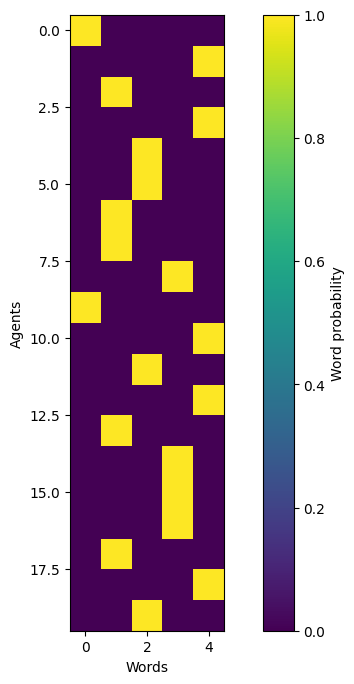

In [3]:
plt.figure(figsize = (10, 8))
plt.imshow(word_prob_matrix[:, -1, :], )#vmax=1, vmin=0)
plt.colorbar(label = 'Word probability')
plt.xlabel('Words')
plt.ylabel('Agents')
plt.show()

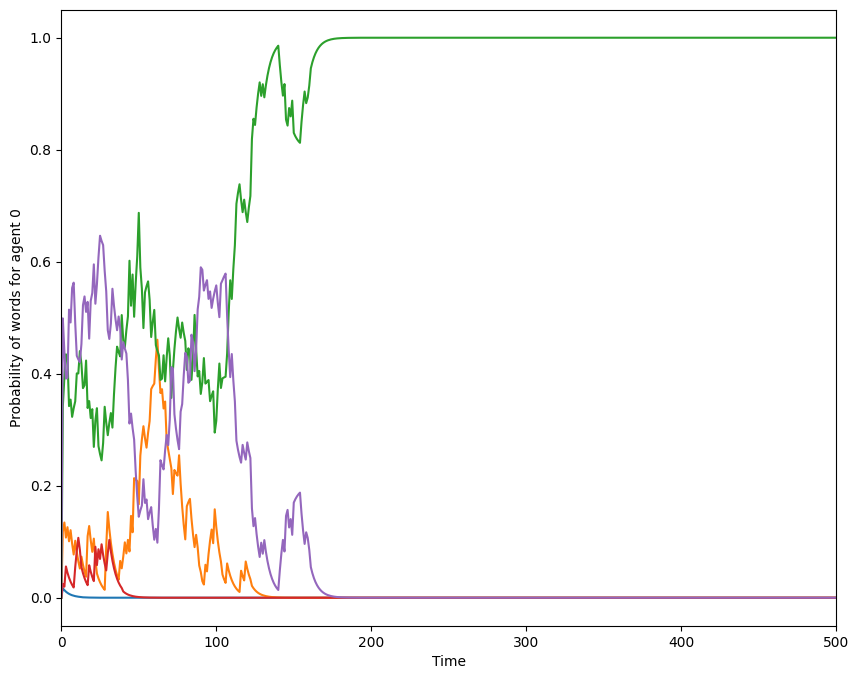

In [9]:
plt.figure(figsize = (10, 8))
# plt.loglog(word_prob_matrix[1, :, :])
plt.plot(word_prob_matrix[-1, :, :])
plt.xlabel('Time')
plt.ylabel('Probability of words for agent 0')
# plt.ylim(10e-4, 1.1)
plt.xlim(0, 500)
plt.show()

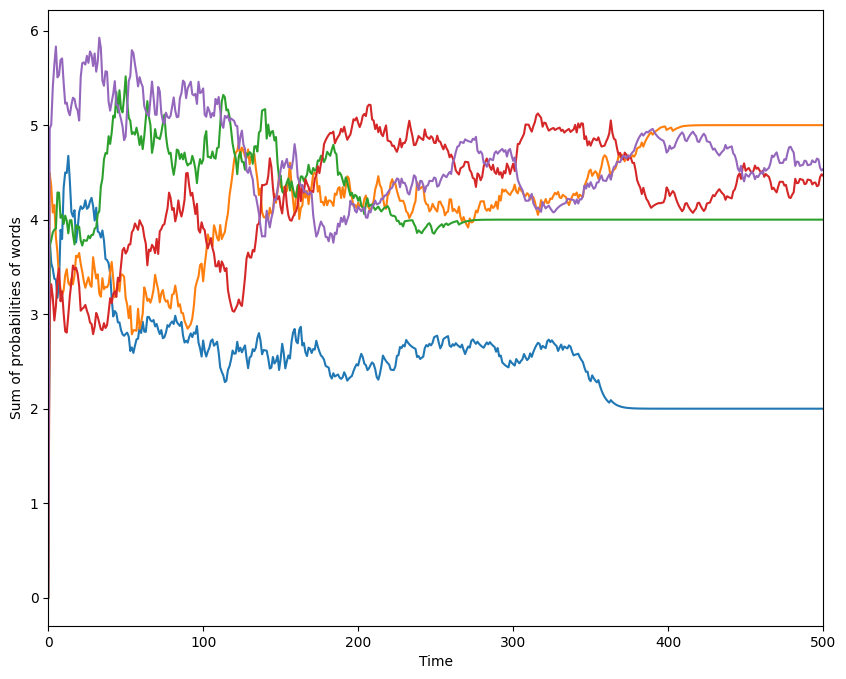

In [10]:
plt.figure(figsize = (10, 8))
pop_stat = np.zeros((num_words, num_iter + 1))
for it in range(num_iter):
    pop_stat[:, it] = word_prob_matrix[:, it, :].sum(axis = 0)
#     plt.scatter(np.arange(num_iter), word_prob_matrix[:, it, :].sum(axis = 0))
model = utterance.LanguageModel(num_agents, num_words, network_type, t)
for nw in range(num_words):
    plt.plot(pop_stat[nw, :])
plt.xlim(0, 500)
plt.xlabel('Time')
plt.ylabel('Sum of probabilities of words')
plt.show()